# Dataset input:


Копирование файлов с Git на локальный диск виртуальной машины - вставка ссылки с гитхаба:

In [1]:
!git clone https://github.com/smartsinovich/career-msu.git


Cloning into 'career-msu'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # import matplotlib for graphs



## Explore Bank Offices Data


## 1. Let's input dataset first

In [0]:
MGU_data = pd.read_csv('/content/career-msu/data - data (2).csv')

## 2. Let's take a peek at what we have[](http://)

In [4]:
# shape of dataset
print("Dataset dimension:")
print(MGU_data.shape)

Dataset dimension:
(717, 33)


In [0]:
# check the data type of the columns
print("Data types:")
print(MGU_data.dtypes)

Data types:
id                          int64
post_id                   float64
open_date                 float64
street                     object
address                    object
place_type                 object
shop_centre                  bool
dns                          bool
lat                       float64
lon                       float64
response                   object
district                   object
post2                      object
is_center                  object
price                     float64
parking_count             float64
parking_min_distance      float64
finance_count             float64
shop_count                float64
distance_100              float64
distance_500              float64
cafe_count                float64
culture_count             float64
job_gov_count             float64
metro_count               float64
metro_min_distance        float64
transport_count           float64
transport_min_distance    float64
working_days              float64
wo

In [0]:
MGU_data.shape

(717, 33)

In [0]:
# take a peek
print("Top 10 rows:")
MGU_data.head(3)

Top 10 rows:


,id,post_id,open_date,street,address,place_type,shop_centre,dns,lat,lon,response,district,post2,is_center,price,parking_count,parking_min_distance,finance_count,shop_count,distance_100,distance_500,cafe_count,culture_count,job_gov_count,metro_count,metro_min_distance,transport_count,transport_min_distance,working_days,work_hours,weekday_availability,office_hours,is_moscow
0,18017,NaN,2017.0,пл. Преображенская,"пл. Преображенская, дом 8",other,False,False,51.27952,37.50201,"Москва, Преображенская улица, Салтыково, Губки...",Салтыково,309183,False,227892.0,51.0,22.437756,7.0,16.0,7.648714,139.203857,10.0,2.0,9.0,1.0,210.602515,19.0,90.504883,6.0,11.0,1.0,NaN,True
1,5546,NaN,2015.0,пл. Преображенская,"пл. Преображенская, д. 8",ТП,False,False,51.27952,37.50201,"Москва, Преображенская улица, Салтыково, Губки...",Салтыково,309183,False,227892.0,51.0,22.437756,7.0,16.0,7.648714,139.203857,10.0,2.0,9.0,1.0,210.602515,19.0,90.504883,6.0,11.0,1.0,NaN,True
2,6211,NaN,2015.0,пл. Преображенская,"пл. Преображенская, д. 8 ТП №2",ТП,False,False,51.27952,37.50201,"Москва, Преображенская улица, Салтыково, Губки...",Салтыково,309183,False,227892.0,39.0,39.888740,8.0,15.0,11.275286,111.105429,12.0,2.0,15.0,1.0,434.931238,23.0,25.471714,6.0,11.0,1.0,NaN,True


In [0]:
list(MGU_data.columns.values)

['id',
 'post_id',
 'open_date',
 'street',
 'address',
 'place_type',
 'shop_centre',
 'dns',
 'lat',
 'lon',
 'response',
 'district',
 'post2',
 'is_center',
 'price',
 'parking_count',
 'parking_min_distance',
 'finance_count',
 'shop_count',
 'distance_100',
 'distance_500',
 'cafe_count',
 'culture_count',
 'job_gov_count',
 'metro_count',
 'metro_min_distance',
 'transport_count',
 'transport_min_distance',
 'working_days',
 'work_hours',
 'weekday_availability',
 'office_hours',
 'is_moscow']

Для анализа возьмем несколько колонок. Остальные не несут в себе значимой информации

In [0]:
data = MGU_data

In [0]:
data = data[[ 'post_id',
 'open_date',
 'address', 
 'lat',
 'lon',
 'district',
 'post2',
 'working_days',
 'work_hours',
 'weekday_availability',
 'office_hours',
 'price',
 'is_moscow']]

In [0]:
data.shape

(717, 13)

Сколько всего отделений в датасете? 
Похоже, что одно и то же отделение может быть занесено несколько раз...



In [0]:
print("Number of unique mail office:", data['address'].nunique())
#ответ 703. есть пересечения

Number of unique mail office: 703


In [0]:
# take a peek at the address column
data['address'].head()

0          пл. Преображенская, дом 8
1           пл. Преображенская, д. 8
2    пл. Преображенская, д. 8  ТП №2
3          пл. Преображенская, дом 8
4              рп Андреевка, дом 3 Б
Name: address, dtype: object

Перечень уникальных названий дает цифру меньшую размеров датасета. Т.е. пересечения уже есть. 
Будем выявлять отделения через координаты. 

# Проверка широты и долготы на уникальность

In [0]:
print("Number of unique mail office:", data['lat'].nunique())
#если берем широту (lat) - еще меньше 557

Number of unique mail office: 557


In [0]:
print("Number of unique mail office:", data['lon'].nunique())
#если берем широту (lon) -    одинаковая с lat 557

Number of unique mail office: 557


In [0]:
data['lat']

0      51.279520
1      51.279520
2      51.279520
3      51.279520
4      52.191502
         ...    
712    55.798546
713    55.768131
714    55.813648
715    55.665894
716    56.279617
Name: lat, Length: 717, dtype: float64

In [0]:
# take a peek at the lat column
data['lat'].head()

0    51.279520
1    51.279520
2    51.279520
3    51.279520
4    52.191502
Name: lat, dtype: float64

In [0]:
# take a peek at the lon column
data['lon'].head()

0    37.502010
1    37.502010
2    37.502010
3    37.502010
4    30.293079
Name: lon, dtype: float64

In [0]:
data.lat.unique()

In [0]:
df_lat = data.lat.drop_duplicates()

In [0]:
df_lat.shape

(557,)



---



# Цены на недвижимость

Выделим датасеты для цен на недвижимость для Москвы и неМосквы.

In [0]:
df_mos = data.loc[data['is_moscow'] != 0]   # таблица для москвы

In [0]:
df_mos.head(10)

In [0]:
count_by_price = df_mos['price'].value_counts() # для москвы
count_by_price.describe()

count     62.000000
mean       6.741935
std       23.427555
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max      187.000000
Name: price, dtype: float64

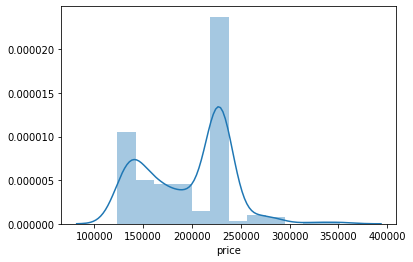

In [0]:
import seaborn as sns, numpy as np
sns_plot = sns.distplot(df_mos['price'])
fig = sns_plot.get_figure()

In [0]:
df_no_mos = data.loc[data['is_moscow'] != 1]   # таблица для подмосковья

In [0]:
count_by_price = df_no_mos['price'].value_counts() # для москвы
count_by_price.describe()

count    41.000000
mean      4.707317
std       3.219036
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max      13.000000
Name: price, dtype: float64

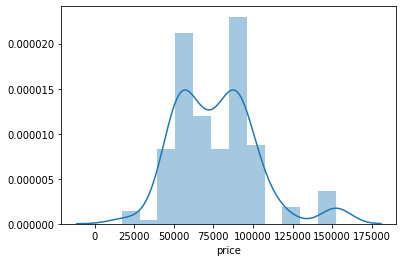

In [0]:
import seaborn as sns, numpy as np
sns_plot = sns.distplot(df_no_mos['price'])
fig = sns_plot.get_figure()

Цены в подмосковье более приближены к нормальному распределению.

*****************************

# Bank Offices Exploration and Visualizations:

Как много офисов открывалось каждый год?

In [0]:
by_join_date = data[['open_date']].groupby(by='open_date').size().rename('number_of_offices')
by_join_date

open_date
2012.0      4
2013.0     26
2014.0     13
2015.0     19
2016.0    181
2017.0    335
2018.0     91
2019.0      7
Name: number_of_offices, dtype: int64

In [0]:
by_join_date.sum()

676

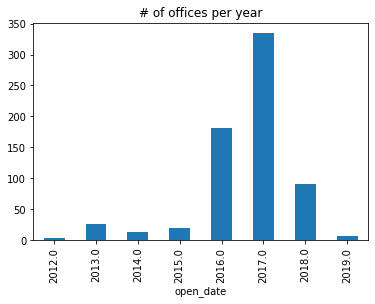

In [0]:
b = by_join_date.plot.bar(title='# of offices per year')

сколько в Mоскве


In [0]:
#print("Number of unique bank office in Moscow:", data['is_moscow'].nunique())
# москва vs немосква. 

In [0]:
by_join_moscow = data[['is_moscow']].groupby(by='is_moscow').size().rename('number_of_moscow_offices')
by_join_moscow

is_moscow
False    298
True     418
Name: number_of_moscow_offices, dtype: int64

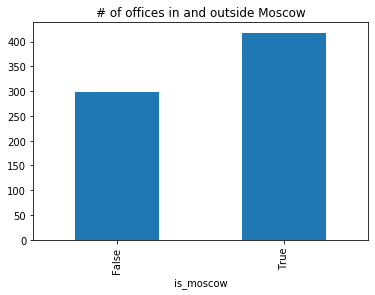

In [0]:
c = by_join_moscow.plot.bar(title='# of offices in and outside Moscow')

# Отделения по округам (district)

In [0]:
# take a peek at the district column
data['district'].head()

0    Салтыково
1    Салтыково
2    Салтыково
3    Салтыково
4     Речицкий
Name: district, dtype: object

В одном округе может быть несколько отделений

In [0]:
print("Number of unique districts:", data['district'].nunique())

Number of unique districts: 277


Округа - разные по размеру, количество отделений в них отличается. 

Поделим округа на московские и немосковские:

**Москва:**

In [0]:
df_mos['district']   # в москве

0                            Салтыково
1                            Салтыково
2                            Салтыково
3                            Салтыково
149                     Преображенское
                    ...               
559                              Сокол
560                              Сокол
561                             Митино
562                             Митино
563    Западный административный округ
Name: district, Length: 419, dtype: object

In [0]:
df_mos['district'].value_counts() #в москве

Центральный административный округ         19
Южный административный округ               13
Марьино                                    12
Москва                                     11
Алексеевский                               10
                                           ..
Марьина Роща                                1
Северо-Восточный административный округ     1
поселение Сосенское                         1
Бауманка                                    1
городской округ Истра                       1
Name: district, Length: 152, dtype: int64

Text(0, 0.5, 'кол-во отделений')

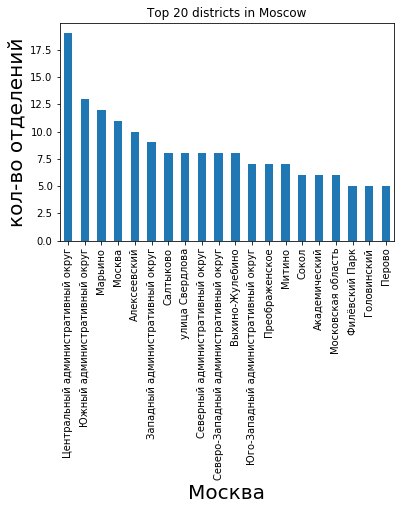

In [0]:
nameplot = df_mos['district'].value_counts()[:20].plot.bar(title='Top 20 districts in Moscow')
nameplot.set_xlabel('Москва',size=20)
nameplot.set_ylabel('кол-во отделений',size=20)

In [0]:
count_by_district = df_mos['district'].value_counts()
count_by_district.describe()

count    152.000000
mean       2.750000
std        2.675001
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       19.000000
Name: district, dtype: float64

Большинство округов имеют всего 2-3 отделения. mean number = 2.75

Самое большое количество отделений (19)  в Центральном административном округе.



---



**не Москва:**

In [0]:
df_no_mos['district']   # в подмосковье

4                            Речицкий
5      Наро-Фоминский городской округ
6      Наро-Фоминский городской округ
7                            Балашиха
8            городской округ Балашиха
                    ...              
712                      Электросталь
713                      Электросталь
714                      Электросталь
715       Одинцовский городской округ
716                            Яхрома
Name: district, Length: 299, dtype: object

In [0]:
df_no_mos['district'].value_counts()

Московская область             12
городской округ Подольск       10
Коломенский городской округ    10
городской округ Серпухов        9
городской округ Истра           8
                               ..
Нахабино                        1
Красноармейск                   1
Новая Деревня                   1
Лобня                           1
Чкаловское шоссе                1
Name: district, Length: 134, dtype: int64

Text(0, 0.5, 'кол-во отделений')

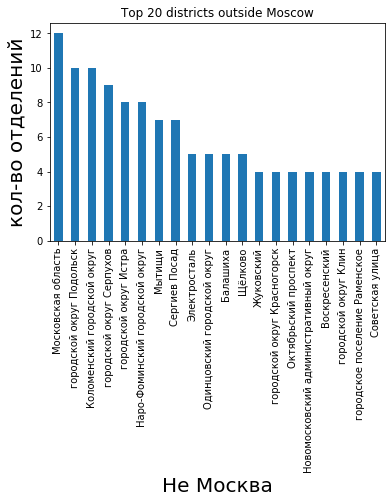

In [0]:
nameplot = df_no_mos['district'].value_counts()[:20].plot.bar(title='Top 20 districts outside Moscow')
nameplot.set_xlabel('Не Москва',size=20)
nameplot.set_ylabel('кол-во отделений',size=20)

In [0]:
count_by_district = df_no_mos['district'].value_counts()
count_by_district.describe()

count    134.000000
mean       2.223881
std        2.054307
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       12.000000
Name: district, dtype: float64

Большинство округов вне Москвы имеют 2 отделения. mean number = 2.22




---




Сколько округов имеют больше чем три отделения?




In [0]:
print(len(count_by_district[count_by_district < 3]), "districts with less than 3 mail offices")
print(len(count_by_district[count_by_district > 3]), "districts with more than 3 mail offices")
print(len(count_by_district[count_by_district < 2 ]), "districts with 1 mail offices")


96 districts with less than 3 mail offices
23 districts with more than 3 mail offices
74 districts with 1 mail offices


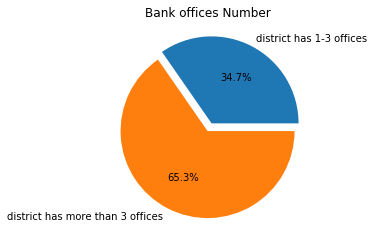

In [0]:
# plot pie chart
fig, ax = plt.subplots()
total_districts_with_less_than_3_offices = len(count_by_district[count_by_district < 3])
total_districts_with_greater_equal_3_offices = data['district'].nunique() - total_districts_with_less_than_3_offices
values = [total_districts_with_less_than_3_offices, total_districts_with_greater_equal_3_offices]
ax.pie(values, 
       labels=["district has 1-3 offices", "district has more than 3 offices"], autopct='%.1f%%', radius=1, 
       explode = (0.1, 0))
ax.set_aspect('equal')
ax.set_title("Bank offices Number")
plt.show()




---



---



---



# Работа с картой

In [0]:
coordinates = data[['lat', 'lon']][0:50]
coordinates


Для удобства выделим координаты отделений в отдельный файл





In [0]:
data = MGU_data
import pandas as pd 

lat_ = data['lat']
lon_ = data['lon']
open_date_ = data['open_date']

# словарь списков

dict = {'lat': lat_, 'lon': lon_, "open_date": open_date_} 
df = pd.DataFrame(dict)
  
# сохранение кадра данных
df.to_csv('file2.csv', header=True, index=False)


In [0]:
data = pd.read_csv('/content/file2.csv') # проверка читабельности
data

In [0]:
!pip install folium

In [0]:
import folium
import pandas as pd

In [0]:
#https://proglib.io/p/python-web-map   инструкция по работе с картой лежит здесь

#Import Library
import folium

#Create base map
map = folium.Map(location=[55.7, 37.6], zoom_start = 10) #если нужно создать карту пишем эту строку с координатами центра

#Save the map
map.save("map.html") # карты сохраняются в виде отдельного файла. их потом можно вызывать напрямую.
map

Прочитаем координаты для всех отделений:

In [0]:
df = pd.read_csv('/content/file2.csv')
df

,lat,lon,open_date
0,51.279520,37.502010,2017.0
1,51.279520,37.502010,2015.0
2,51.279520,37.502010,2015.0
3,51.279520,37.502010,2017.0
4,52.191502,30.293079,2017.0
...,...,...,...
712,55.798546,38.461303,2017.0
713,55.768131,38.426440,2017.0
714,55.813648,38.431939,2016.0
715,55.665894,37.180020,2017.0


In [0]:
import folium
import pandas as pd

df = pd.read_csv('/content/file2.csv')
lat = df['lat']
lon = df['lon']


#map = folium.Map(location=[55.7, 37.6], zoom_start = 7, tiles = "Mapbox bright")

for lat, lon in zip(lat, lon):
    folium.Marker(location=[lat, lon], popup=None, icon=folium.Icon(color = 'green')).add_to(map)

map.save("map2.html")
map




группируем маркеры.
Выделим цветом отделения открытые в разные годы:

Зеленый - до 2016
Оранжевый - 2017
Красный -  2018


In [0]:
import folium
import pandas as pd

df = pd.read_csv('/content/file2.csv')
lat = df['lat']
lon = df['lon']
open_date = df['open_date']

def color_change(open_date):
    if(open_date < 2016):
        return('green')
    elif(2017 <= open_date <2018):
        return('orange')
    else:
        return("red")


        #map = folium.Map(location=[55.7, 37.6], zoom_start = 7, tiles = "Mapbox bright")

for lat, lon, open_date in zip(lat, lon, open_date):
    folium.Marker(location=[lat, lon], popup=str(open_date), icon=folium.Icon(color = color_change(open_date))).add_to(map)

#map.save("map3.html")
#map


In [0]:
map



---



---

